In [2]:
import pandas as pd
df = pd.read_csv('car-prices.csv')
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
sold_swap = {
    'yes': 1,
    'no': 0
}
df['sold'] = df['sold'].map(sold_swap)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] * 1.60934
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [50]:
x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

In [51]:
seed = pd.np.random.seed(5)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

model = LinearSVC(random_state=20)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

/Users/lucheol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5836

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/glossary.html#term-random-state

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

model = SVC(random_state=20)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

/Users/lucheol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.58

In [80]:
from sklearn.dummy import DummyClassifier
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243-t194/master/car-prices.csv')

sold_swap = {
    'yes': 1,
    'no': 0
}
df['sold'] = df['sold'].map(sold_swap)

df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] * 1.60934

df.dropna(inplace=True)

x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

baseline = DummyClassifier()
baseline.fit(train_x, train_y)
baseline.score(test_x, test_y)

0.51

In [83]:
#Seu nome completo

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(random_state=20)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

0.7592

In [84]:
from joblib import dump, load
dump(model, 'teste.joblib')

['teste.joblib']

In [86]:
loaded_model = load('teste.joblib')
predicts = loaded_model.predict(test_x)
accuracy_score(test_y, predicts)

0.7592

In [91]:
# decision tree
# é melhor para valores que são "discrepantes"...

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

0.7144

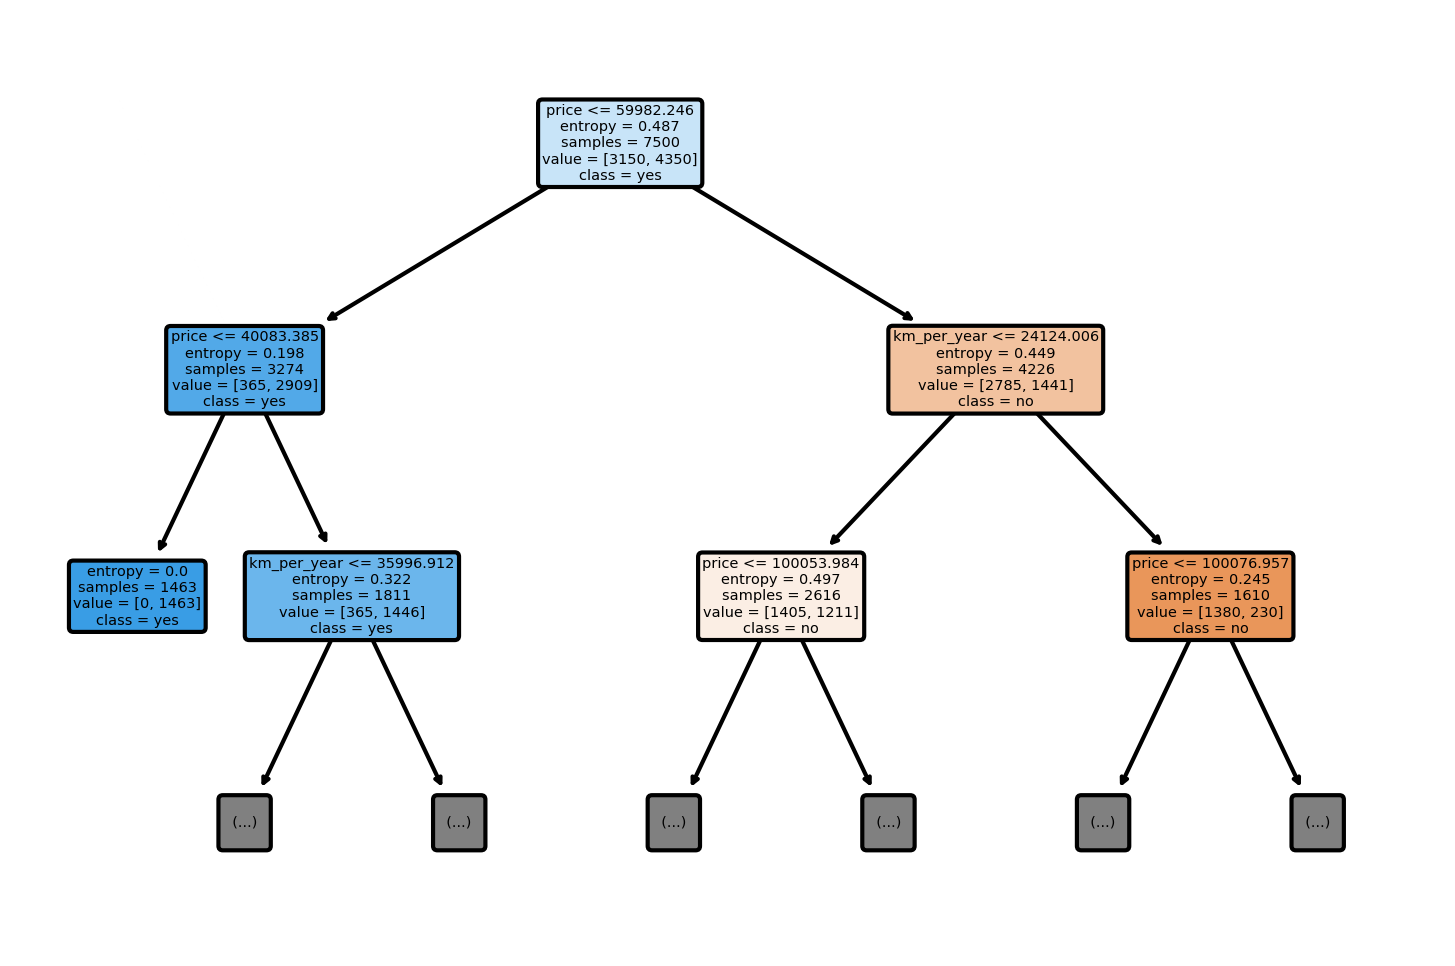

In [110]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model, max_depth=2, filled=True, rounded=True, feature_names=x.columns, class_names=['no', 'yes'])
plt.show()

In [101]:
x.columns

Index(['price', 'model_age', 'km_per_year'], dtype='object')